# Interfacing with OS GPX data

## Preprocessing

Importing the correct packages

In [4]:
import os
import gpxpy.gpx
import geopandas as gpd
from pyproj import CRS
from pyproj import Transformer
from shapely.geometry import Point, LineString

loading a convertor to change to OSGB

In [5]:
wsg84 = CRS.from_epsg(4326)
osgb36 = CRS.from_epsg(27700)
transformer = Transformer.from_crs(wsg84, osgb36)

## For GPX with routes

Loading Gps data in and parsing it through

In [13]:
gpx_file = open(os.path.join('Walking routes','Bluebell walk.gpx'), 'r')

gpx = gpxpy.parse(gpx_file)

### Converting to geodataframe
gpx.routes into geodataframe

C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\geopandas\plotting.py:410: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  UserWarning,


<AxesSubplot:>

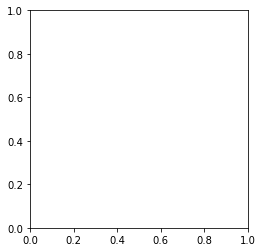

In [12]:
routes = gpx.routes
waypoints = routes[0].points
coords = []
for waypoint in waypoints:
    coords.append(transformer.transform(waypoint.latitude, waypoint.longitude))
route_gpd = gpd.GeoDataFrame(index=[0], crs='epsg:27700', geometry=[LineString(coords)])
route_gpd.plot()

## For GPX with waypoints

Loading Gps data in and parsing it through

In [15]:
gpx_file = open(os.path.join('Walking routes','Sheeps Tor.gpx'), 'r')

gpx = gpxpy.parse(gpx_file)

### Converting to geodataframe
gpx.routes into geodataframe

<AxesSubplot:>

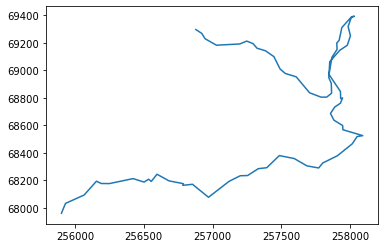

In [11]:
waypoints = gpx.waypoints
coords = []
for waypoint in waypoints:
    coords.append(transformer.transform(waypoint.latitude, waypoint.longitude))
route_gpd = gpd.GeoDataFrame(index=[0], crs='epsg:27700', geometry=[LineString(coords)])
route_gpd.plot()

## Accounting for both

<AxesSubplot:>

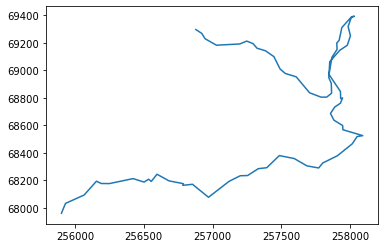

In [16]:
coords = []
if gpx.waypoints:
    waypoints = gpx.waypoints
else:
    routes = gpx.routes
    waypoints = routes[0].points

for waypoint in waypoints:
    coords.append(transformer.transform(waypoint.latitude, waypoint.longitude))

route_gpd = gpd.GeoDataFrame(index=[0], crs='epsg:27700', geometry=[LineString(coords)])
route_gpd.plot()

## Extracting Bounds

In [17]:
bounds = []
for bound in gpx.bounds:
    bounds.append(bound)
top_right = (transformer.transform(bounds[1], bounds[3]))
bottom_left = (transformer.transform(bounds[0], bounds[2]))